# Assignment 2


*by Anton Akusok*


   ### **1. Data normalization**
   ##### - Look at features of Linnerud dataset, tell what is the problem with them
   #####       from sklearn.datasets import load_linnerud
   ##### - Normalize these features using a correct method. Plot original vs normalized probability density.

In [18]:
import plotly as ply
import pandas as pd
import numpy as np
import math 
import sklearn.preprocessing as MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

import sklearn
from sklearn.datasets import load_linnerud


!pip install mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 



In [19]:
# from sklearn.datasets import load_linnerud

df = load_linnerud()

X = df.data
variable_name = df.feature_names

data = pd.DataFrame(X, columns=variable_name)

print(data)

    Chins  Situps  Jumps
0     5.0   162.0   60.0
1     2.0   110.0   60.0
2    12.0   101.0  101.0
3    12.0   105.0   37.0
4    13.0   155.0   58.0
5     4.0   101.0   42.0
6     8.0   101.0   38.0
7     6.0   125.0   40.0
8    15.0   200.0   40.0
9    17.0   251.0  250.0
10   17.0   120.0   38.0
11   13.0   210.0  115.0
12   14.0   215.0  105.0
13    1.0    50.0   50.0
14    6.0    70.0   31.0
15   12.0   210.0  120.0
16    4.0    60.0   25.0
17   11.0   230.0   80.0
18   15.0   225.0   73.0
19    2.0   110.0   43.0


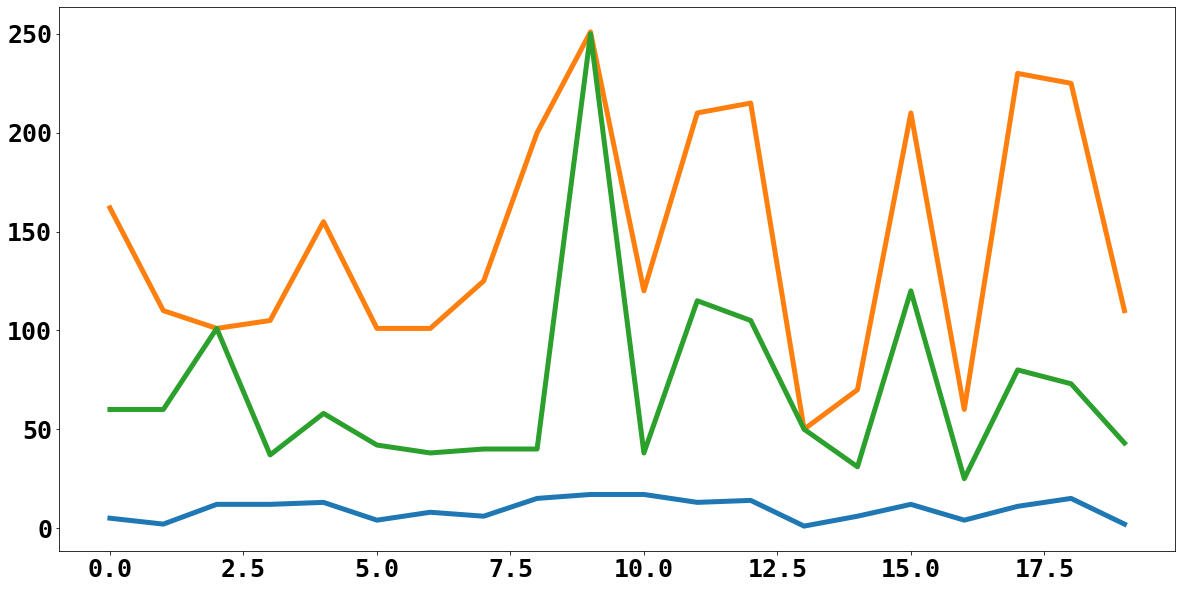

In [20]:
plt.plot(data)

In [21]:
X

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [22]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(X)
print("Normalized Data = ", normalized_X)

Normalized Data =  [[0.02893075 0.93735624 0.34716898]
 [0.0159597  0.87778376 0.47879114]
 [0.08371776 0.70462449 0.70462449]
 [0.10716849 0.93772429 0.33043618]
 [0.07831041 0.93370106 0.34938491]
 [0.03654378 0.92273042 0.38370968]
 [0.0739316  0.9333864  0.35117508]
 [0.04566866 0.95143043 0.30445774]
 [0.07334547 0.97793957 0.19558791]
 [0.04793203 0.70770239 0.70488286]
 [0.13384167 0.94476475 0.2991755 ]
 [0.05421658 0.87580623 0.47960818]
 [0.05841147 0.8970333  0.43808603]
 [0.01414072 0.70703608 0.70703608]
 [0.07813321 0.91155416 0.40368827]
 [0.04955294 0.8671765  0.49552943]
 [0.06142227 0.92133403 0.38388918]
 [0.04512557 0.94353466 0.32818597]
 [0.06328551 0.94928259 0.30798946]
 [0.01693153 0.93123414 0.36402789]]


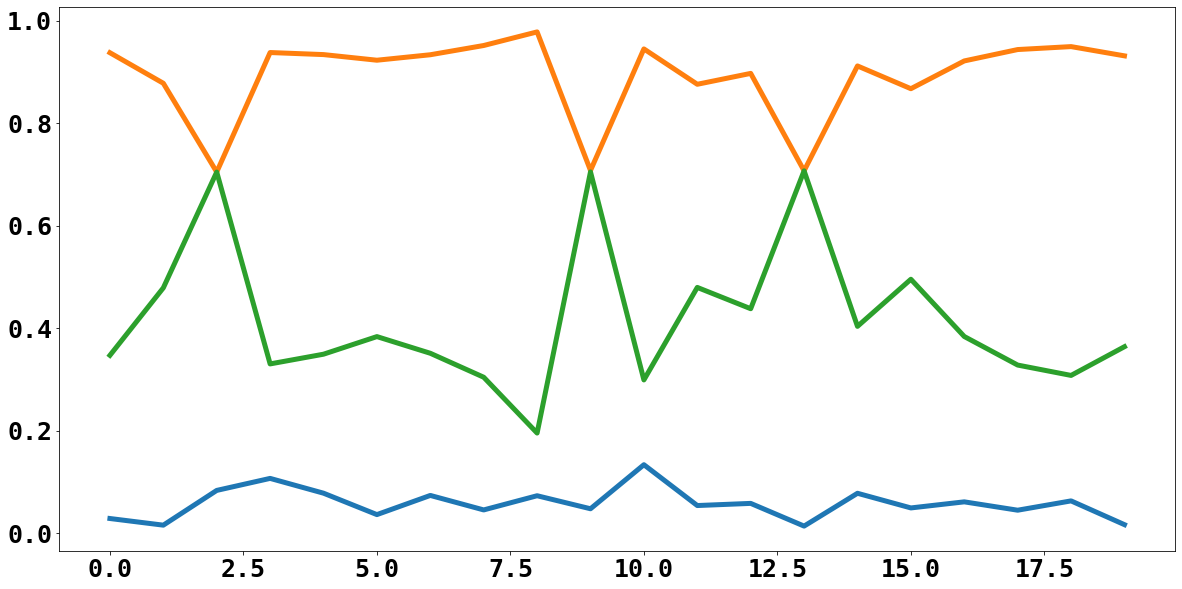

In [23]:
plt.plot(normalized_X)

    
   ### **2. Dimensionality reduction**
   ##### - Load 20 News Dataset
   #####       from sklearn.datasets import fetch_20newsgroups_vectorized
   #####       data = fetch_20newsgroups_vectorized(subset='train')
   ##### - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
   #####       Remember that you can load training and testing subsets of data!

In [32]:
from sklearn.datasets import fetch_20newsgroups_vectorized
train_data = fetch_20newsgroups_vectorized(subset='train')
test_data = fetch_20newsgroups_vectorized(subset='test')

X1_train, y1_train = (train_data['data']).toarray(), train_data['target']
X1_test, y1_test = (test_data['data']).toarray(), test_data['target']

print(f'Original shape: {X1_train.shape}')
# variable_name = df1.target_names
# y1 = pd.DataFrame(df1.target)


Original shape: (11314, 130107)


In [38]:
import sklearn.preprocessing as MinMaxScaler

data = ([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])
scaler = MinMaxScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)


TypeError: 'module' object is not callable

In [30]:
from sklearn.decomposition import KernelPCA

# keep the first two principal components of the data
# pca = PCA(n_components=300)

dr_500 = KernelPCA(n_components=500, kernel = 'linear')
X_reduced_500 = dr_500.fit_transform(X1_train_scaled)
print(f'Reduced shape of X: {X_reduced_500.shape}')

NameError: name 'X1_train_scaled' is not defined

   ### **3. Clustering**
   ##### - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
   #####       Did you manage to recover the original clusters?  (se an example plot)

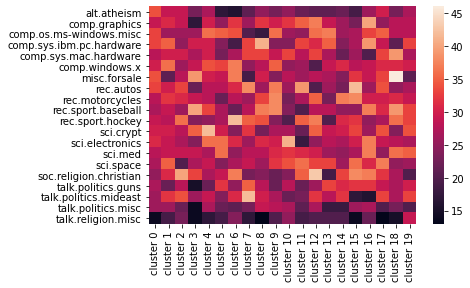 
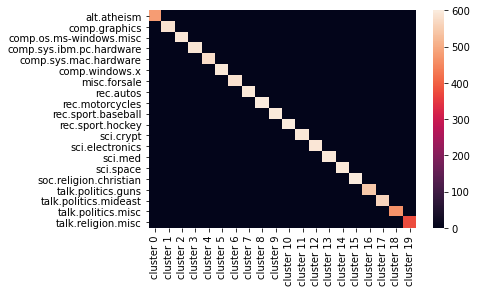

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

Clusters = y1.copy()
Clusters[:3000] = 3

cm = confusion_matrix(y1, Clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])